# Muhammad Fazal Hildiansyah - DS2

## Business Understanding

### Problem Statement
Company wants to know their customer segments, how much cluster that they have from rettail data. This insight will be useful for the next sales strategy.

### Objectives
Build a Machine Learning model to give company insight about customer segmentation.

### Expected Output
Machine Learning model with clustering algorithm

## Data Understanding

Data column values :
- InvoiceNo : Identifier for the invoice.
- StockCode : Identifier for the item.
- Description : Name of the item.
- Quantity : Quantity of item sold.
- InvoiceDate : Date of invoice.
- UnitPrice : Item Unit Price. 
- CustomerID : Identifier for the customer.
- Country : Country of the customer.

## Import Library
> Start from import libraries that we will use for analysis.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import math

# import scaler dari sckit-learn untuk scaler point
from sklearn.preprocessing import StandardScaler

# import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

# import warning agar tidak muncul warning terus di google colab
import warnings
warnings.filterwarnings("ignore")

## Data extraction
> Extracting data from excel.

In [2]:
# Extract datasource from Excel
df_raw = pd.read_excel('online-retail.xlsx')
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleansing
> Check data correlation, anomaly, missing value or wrong data types.

In [3]:
print("Number of rows = {}".format(df_raw.shape[0]))
print("Number of columns = {}".format(df_raw.shape[1]))

Number of rows = 541909
Number of columns = 8


In [4]:
# Check Which Column with missing values

df_missing = df_raw.isnull().sum().sort_values(ascending=False)
df_missing[df_missing > 0]

CustomerID     135080
Description      1454
dtype: int64

In [5]:
# Karena CustomerID paling banyak null, dan untuk menganalisa Customer Segmentation dibutuhkan data customerID tersebut, serta
# Data ini tidak bisa kita lakukan impute missing values, jadi baiknya kita drop terlebih dahulu data yang customerID null
# Merelakan data 135.080 rows
df_raw['cust_null'] = pd.isna(df_raw['CustomerID'])
display(df_raw[df_raw['cust_null'] == True])

# untuk description bisa kita ignore karena kita akan menggunakan stockcode saja

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cust_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,True
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,True
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,True
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,True
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,True
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,True
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,True
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,True


In [6]:
# Filter kita ambil yg ada customerID saja
df_raw2 = df_raw[df_raw['cust_null'] == False]

# lalu drop kolom cust_null karena semua customerID tidak ada yg null lagi
df_raw2 = df_raw2.iloc[:, :-1]
df_raw2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
# sekarang cek describe
df_raw2.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Disini terlihat ada quantity yang minus serta unitPrice 0, kita coba check data tersebut
display(df_raw2[(df_raw2['Quantity']<=0) | (df_raw2['UnitPrice']<=0)].head())

print("Total rows with Quantity <= 0 : {}".format(df_raw2['Quantity'][(df_raw2['Quantity']<=0)].count()))
print("Total rows with UnitPrice <= 0 : {}".format(df_raw2['UnitPrice'][(df_raw2['UnitPrice']<=0)].count()))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Total rows with Quantity <= 0 : 8905
Total rows with UnitPrice <= 0 : 40


In [9]:
# Dari sample diatas bisa kita asumsikan quantity < 0 ada di awalan InvoiceNo C, coba kita buktikan terlebih dahulu
print("Apakah awalan dari invoice dengan quantity < 0 ? ", df_raw2.loc[(df_raw2['Quantity']<=0), 'InvoiceNo'].apply(lambda x: x[0]).unique())

Apakah awalan dari invoice dengan quantity < 0 ?  ['C']


In [10]:
# karena telah terbukti maka kita filter row dengan quantity > 0
df_raw3 = df_raw2[df_raw2['Quantity'] > 0]

# untuk yg unitPrice 0 juga kita filter, karena termasuk anomaly
df_raw3 = df_raw3[df_raw3['UnitPrice'] > 0]

df_raw3.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75
CustomerID,397884.0,15294.423453,1713.141560,12346.000,13969.00,15159.00,16795.00,18287.00


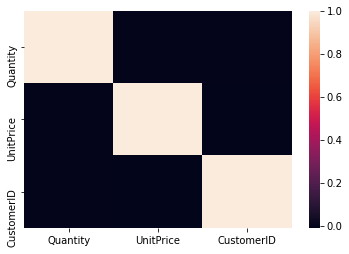

In [11]:
# Check correlation between data
sns.heatmap(df_raw3.corr())

# result : there is no correlation data

In [12]:
# Check Data Types again, and for the CustomerID should be Object
df_raw3.info()

# Update data types of CustomerID
df_raw3['CustomerID'] = df_raw3['CustomerID'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [13]:
# drop duplicate rows, as we don't want to analyze it
df_raw3.drop_duplicates(keep=False,inplace=True) 

In [14]:
# do final check
df = df_raw3.copy()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,387883.0,13.244192,181.587861,1.000,2.00,6.00,12.00,80995.00
UnitPrice,387883.0,3.134954,22.377731,0.001,1.25,1.95,3.75,8142.75


## Data Analysis
> Mulai Analisa data sesuai dengan kebutuhan bisnis

In [15]:
# pertma yg kita lakukan adalah menambahkan kolom TotalPrice
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


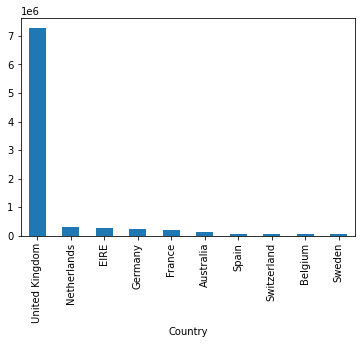

In [16]:
# Kita lakukan EDA dahulu untuk detailnya, pertama dari top 10 country
df.groupby('Country').TotalPrice.sum().sort_values(ascending=False)[:10].plot.bar()

# Bisa dilihat bahwa Penjualan di United Kingdom banyak sekali,
# bisa kita asumsikan kalau data ini berasal dari penjualan domestik UK, dan negara lain adalah export

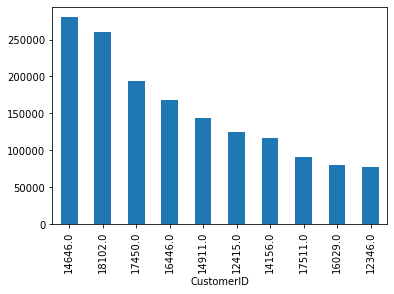

In [17]:
# Top 10 penjualan dari customer
df.groupby('CustomerID').TotalPrice.sum().sort_values(ascending=False)[:10].plot.bar()

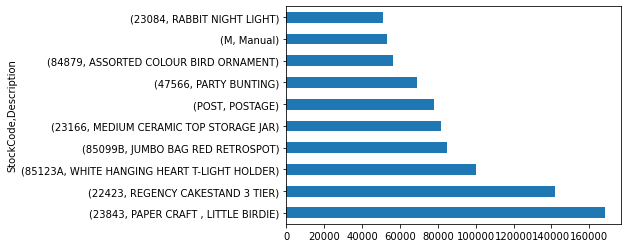

In [18]:
# Top 10 penjualan dari Description, kita liat by StockCode
df.groupby(['StockCode','Description']).TotalPrice.sum().sort_values(ascending=False)[:10].plot.barh()

## Feature Engineering
One of the most popular, easy-to-use, and effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis. RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

- Recency : The freshness of the customer activity based on date
- Frequency : The frequency ot the customer transactions
- Monetary : The intention of the customer spending

And we will analyze United Kingdom data only due to this company base is UK.

## Data Preprocessing

In [19]:
# Filtering UK Data
uk = df[df['Country'] == 'United Kingdom']
print("Number of rows UK Data = {}".format(uk.shape[0]))
print("Number of columns UK Data = {}".format(uk.shape[1]))

Number of rows UK Data = 344466
Number of columns UK Data = 9


### Recency 

In [20]:
# Using Refenrence date
DateRef = uk['InvoiceDate'].max() + datetime.timedelta(days = 1)
print(DateRef)

2011-12-10 12:49:00


In [21]:
# Using Invoice date to count customer activity
uk['recency'] = (DateRef - uk['InvoiceDate']).astype('timedelta64[D]')
uk_model =  uk[['CustomerID', 'recency']].groupby("CustomerID").min().reset_index()

uk_model.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,3920.0,92.208418,99.533854,1.0,18.0,51.0,143.0,374.0


Distribution of Recency


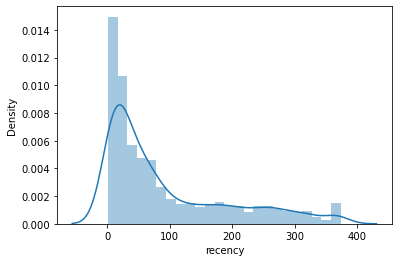

In [22]:
sns.distplot(uk_model['recency'])
print('Distribution of Recency')

### Frequency

In [23]:
# Count frequency using InvoiceNo
frequency = (uk[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
frequency.rename(columns={'InvoiceNo':'frequency'},inplace=True)
uk_model = uk_model.merge(frequency)

In [24]:
uk_model.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,3920.0,92.208418,99.533854,1.0,18.0,51.0,143.0,374.0
frequency,3920.0,4.246173,7.199087,1.0,1.0,2.0,5.0,209.0


Distribution of Frequency


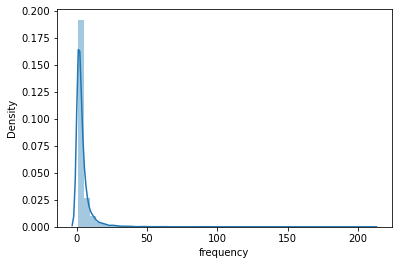

In [25]:
sns.distplot(uk_model['frequency'])
print('Distribution of Frequency')

### Monetary

In [26]:
# Count monetary using sum of TotalPrice
monetary = uk[['CustomerID', 'TotalPrice']].groupby(['CustomerID']).sum().reset_index()
monetary.rename(columns={'TotalPrice':'monetary'},inplace=True)
uk_model = uk_model.merge(monetary)

In [27]:
uk_model.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,3920.0,92.208418,99.533854,1.00,18.000,51.00,143.0000,374.0
frequency,3920.0,4.246173,7.199087,1.00,1.000,2.00,5.0000,209.0
monetary,3920.0,1852.910256,7474.850821,3.75,294.105,638.46,1561.9375,259657.3


Distribution of monetary


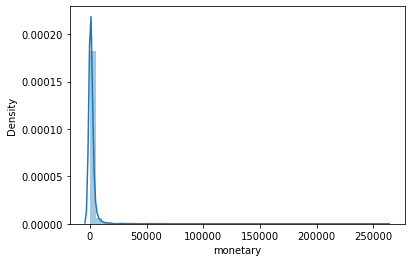

In [28]:
sns.distplot(uk_model['monetary'])
print('Distribution of monetary')

### Data Standarization

Since the distribution not symmetrical, so we have to standarize the variable using StandardScaler.

In [29]:
uk_model['recency_log'] = uk_model['recency'].apply(math.log)
uk_model['frequency_log'] = uk_model['frequency'].apply(math.log)
uk_model['monetary_log'] = uk_model['monetary'].apply(math.log)
feature_vector = ['monetary_log', 'recency_log','frequency_log']
X_subset = uk_model[feature_vector]
scaler = StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
monetary_log,3920.0,-2.361773e-16,1.000128,-4.172059,-0.679183,-0.058529,0.657812,4.752232
recency_log,3920.0,3.412487e-16,1.000128,-2.625681,-0.609422,0.117073,0.836289,1.506948
frequency_log,3920.0,-6.104102e-17,1.000128,-1.050257,-1.050257,-0.280283,0.737566,4.884204


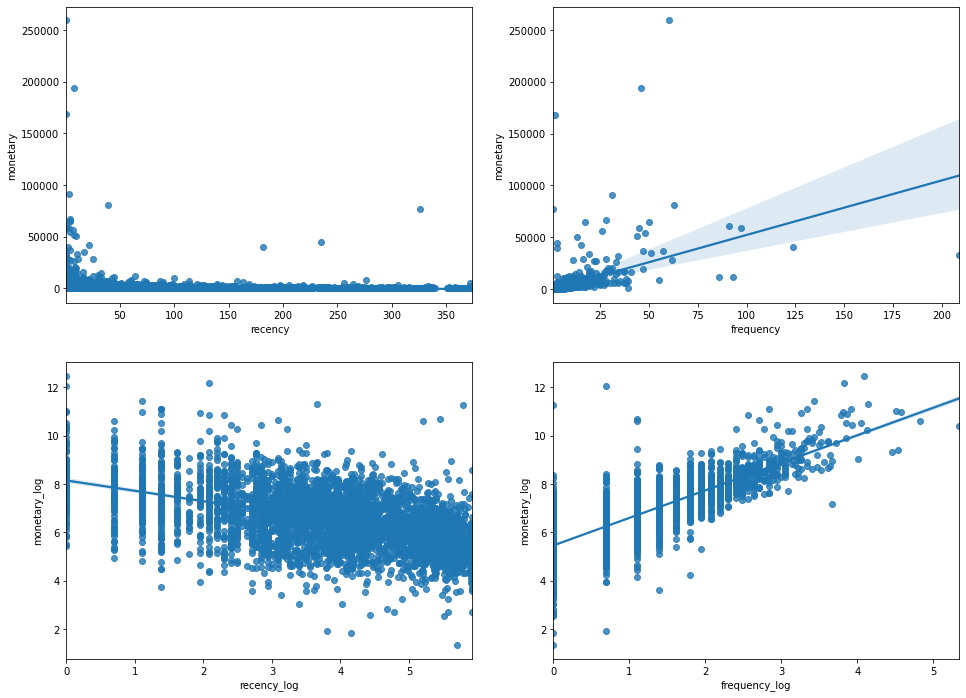

From the log, We can see customers with higher recency tend to spend less money and higher frequency tend to spend more money.


In [30]:
fig = plt.figure(figsize=(16,12))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='monetary', data=uk_model)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='monetary', data=uk_model)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='monetary_log', data=uk_model)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='monetary_log', data=uk_model)

plt.show()
print('From the log, We can see customers with higher recency tend to spend less money and higher frequency tend to spend more money.')

## Data Modelling

We will use K-Means Algorithm, The K-means clustering assign the data in a dataset to one cluster.

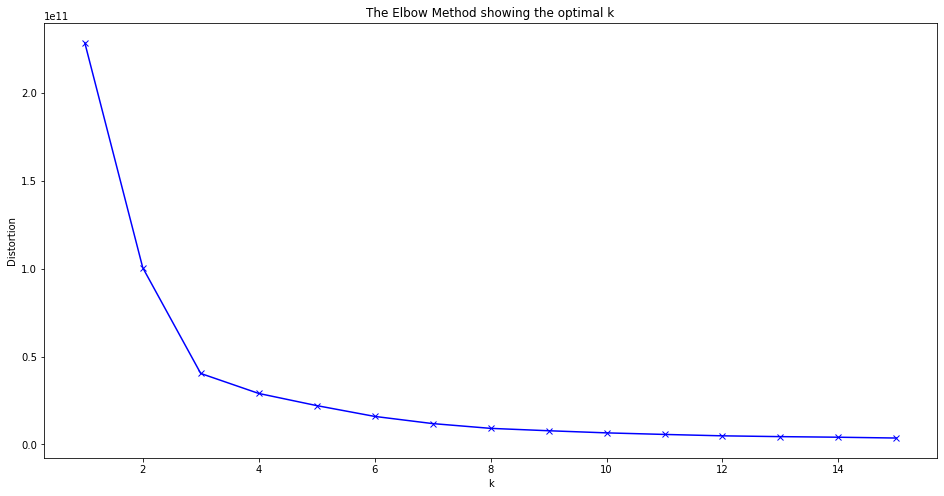

In [31]:
# using Elbow method to find how many cluster

distortions = {}

# KMeans with a range of K
for k in range(1,16):    
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(uk_model)
    distortions[k] = kmeans_model.inertia_
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.title('The Elbow Method showing the optimal k')
plt.plot(list(distortions.keys()), list(distortions.values()), 'bx-')
plt.xlabel('k'); 
plt.ylabel('Distortion')
plt.show()

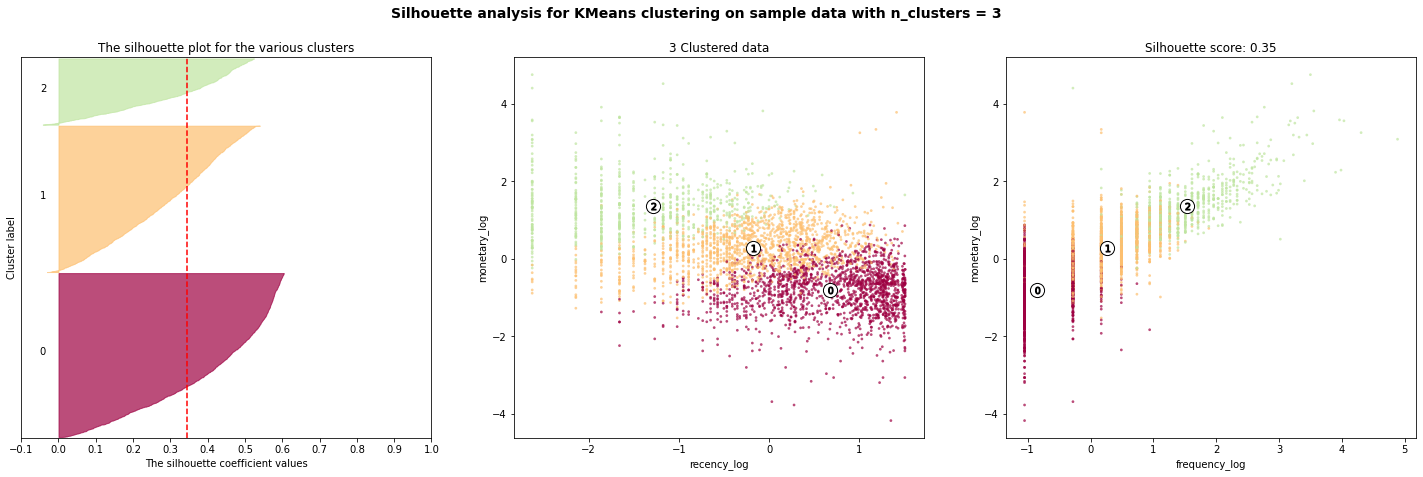

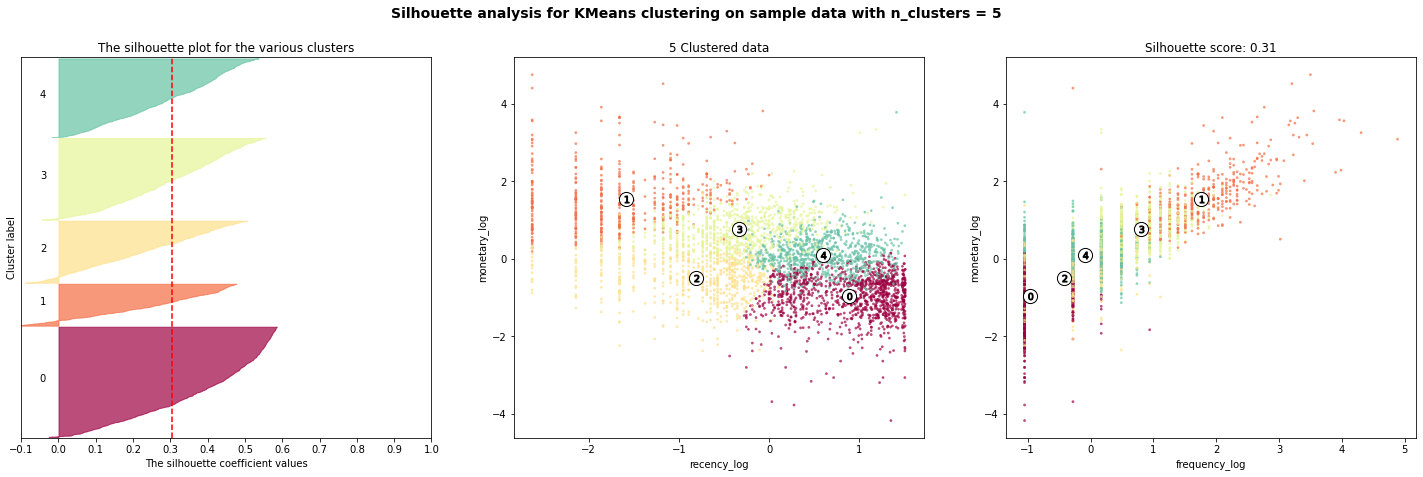

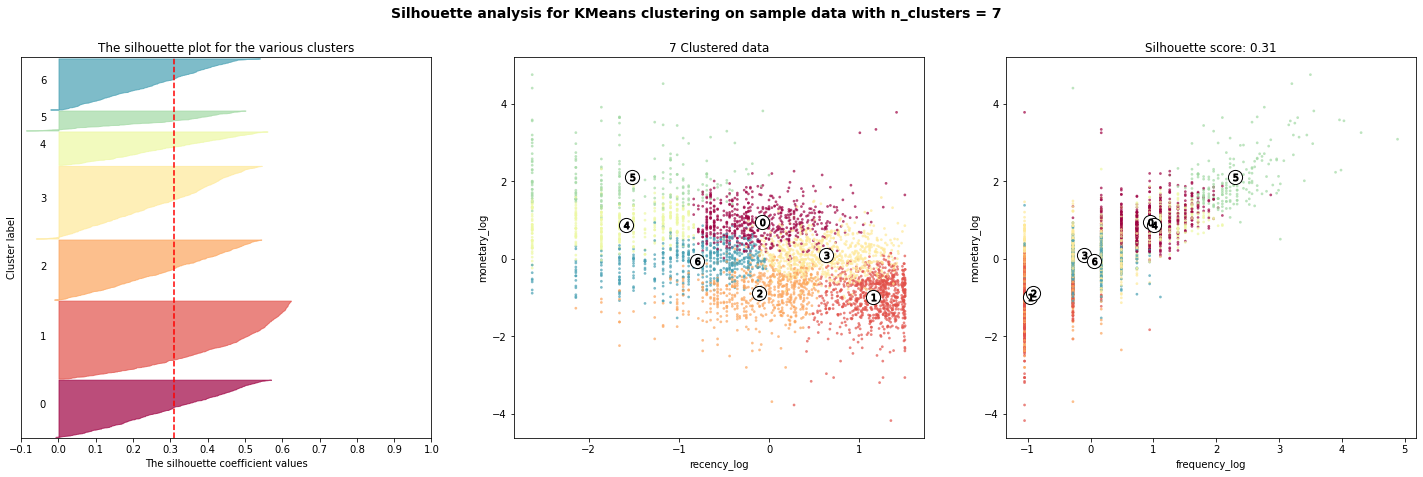

In [32]:
# We see the good elbow is in range 3 - 7
# so we have to chect Silhoutte score, the bigger score is better
cluster_centers = {}

for n_clusters in range(3,8,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

We can see the highest silhouette score is in 3 cluster, so we will use 3 cluster for modelling

In [33]:
# After we get conclusion about how many cluster, so we have to label it to our data
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
labels = kmeans_model.fit_predict(X_scaled)

# Assign Cluster Labels to data
uk_model['Cluster'] = labels
uk_model

,CustomerID,recency,frequency,monetary,recency_log,frequency_log,monetary_log,Cluster
0,12346.0,326.0,1,77183.60,5.786897,0.000000,11.253942,1
1,12747.0,2.0,11,4196.01,0.693147,2.397895,8.341889,2
2,12748.0,1.0,209,32449.90,0.000000,5.342334,10.387453,2
3,12749.0,4.0,5,4090.88,1.386294,1.609438,8.316515,2
4,12820.0,3.0,4,942.34,1.098612,1.386294,6.848366,2
...,...,...,...,...,...,...,...,...
3915,18280.0,278.0,1,180.60,5.627621,0.000000,5.196285,0
3916,18281.0,181.0,1,80.82,5.198497,0.000000,4.392224,0
3917,18282.0,8.0,2,178.05,2.079442,0.693147,5.182064,1
3918,18283.0,4.0,16,1998.68,1.386294,2.772589,7.600242,2


In [34]:
# Check at k-means cluster center
print("Centers of the cluster:")
cent_transformed = scaler.inverse_transform(cluster_centers[3]['cluster_center'])
print(pd.DataFrame(np.exp(cent_transformed),columns=['monetary',  'recency',  'frequency']))

Centers of the cluster:
      monetary     recency  frequency
0   251.861132  113.728987   1.197105
1   976.258840   33.424345   3.261182
2  3804.959318    6.828514  10.192547


Visualization Frequency and Monetary


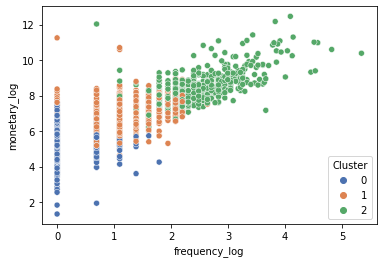

In [35]:
sns.scatterplot(data=uk_model, x="frequency_log", y="monetary_log", hue='Cluster', palette='deep')
print('Visualization Frequency and Monetary')

Visualization Recency and Monetary


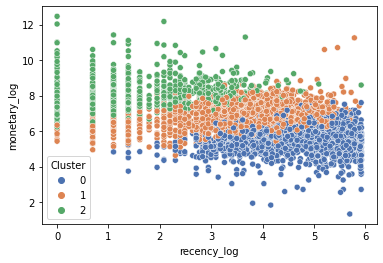

In [36]:
sns.scatterplot(data=uk_model, x="recency_log", y="monetary_log", hue='Cluster', palette='deep')
print('Visualization Recency and Monetary')

In [37]:
uk = uk_model.groupby('Cluster')['monetary', 'frequency', 'recency'].sum()
print(uk)

            monetary  frequency   recency
Cluster                                  
0         550229.491       2178  271439.0
1        1990613.893       5499   81239.0
2        4722564.820       8968    8779.0


Boxplot Recency per cluster


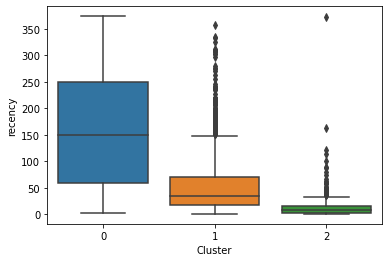

In [38]:
sns.boxplot(x='Cluster', y='recency', data=uk_model)
print('Boxplot Recency per cluster')

Boxplot Frequency per cluster


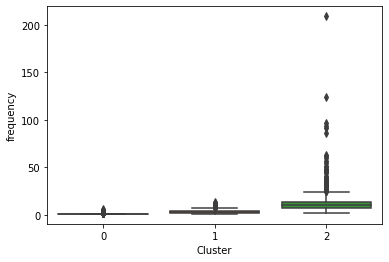

In [39]:
sns.boxplot(x='Cluster', y='frequency', data=uk_model)
print('Boxplot Frequency per cluster')

Boxplot Monetary per cluster


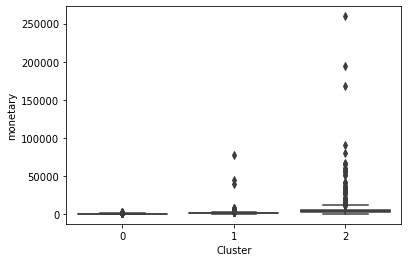

In [40]:
sns.boxplot(x='Cluster', y='monetary', data=uk_model)
print('Boxplot Monetary per cluster')

## Evaluation

In [41]:
# Using David Boulin Index

davies_bouldin_score(X_scaled, labels)

1.0294054190185673

## Deployment

Setelah di evaluasi, kita bisa melakukan deployment dengan menggunakan flask dan serialization menggunakan Pickle


## Conclusion

From the analysis of customer segmentation, we can conclude there are 3 cluser :
- Cluster 0 : Customers with low frequency to shop.
- Cluster 1 : Customers with medium frequency and recency.
- Cluster 2 : Customers with highest frequency and monetary, this is the loyal customer for the company.